## Catch Table Customer Review analysis : EDA
- data source : Catch Table
- period : 2020-06-18 ~ 2023-10-24
- number of stores : 18
- number of reviews : 1,922
--- 

- ※참고1 : 동일 매장에 대해 네이버와 캐치테이블이 서로 다른 상호명을 사용 중, 네이버의 매장명과 브랜드/타입구분 컬럼 별도로 추가하였음 
>  store_catchT : 캐치테이블 매장명 /  store_naver : 네이버 매장명 / brand, type : 캐치테이블 데이터에는 없는 컬럼이나, 네이버에는 존재하는 컬럼 추가 
- ※참고2 : 캐치테이블은 네이버와 달리 5점 만점 기준의 "평점"(rating) 데이터가 존재함 
- ※참고3 : 네이버는 리뷰일자(date)가 연-월-일까지만 있는 반면, 캐치테이블은 연-월-일-시-분까지 존재 --> 시간대별 분석 가능
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import koreanize_matplotlib

In [2]:
## data loading 
df = pd.read_csv('data_catchT/catchtable_riview_all_20231025.csv', encoding = 'cp949')
print(df.shape)
df.head()

(1922, 9)


,review_id,brand,type,store_catchT,store_naver,nickname,content,date,star
0,14041,Chai797,JUCD,Chai797 롯데캐슬잠실점,Chai797 잠실롯데캐슬점,푸디60,NaN,2021-03-09 22:58,3.5
1,20150,Chai797,UCD,Chai797 청계천점,Chai797 청계천점,재미있는 미식가_9435,맛은 그냥 보통보다 조금 괜찮은 정도지만 자리가 넓고 여유로워서 편하게 밥 먹을 수...,2021-04-21 18:37,4
2,42933,Chai797,JUCD,Chai797 시청점,Chai797 시청점,뽀삐이,쾌적한데 맛은 가격대비 못 미치네요\n특히 보리새우 백짬뽕은 너무 맛없었어요 ㅠㅠ,2021-06-29 18:47,2.5
3,51558,Chai797,Black,Chai797 BLACK,Chai797 Black 서래마을,경쾌한 맛사냥꾼_53243,NaN,2021-07-14 15:42,4.5
4,52125,Chai797,Black,Chai797 BLACK,Chai797 Black 서래마을,다름아,NaN,2021-07-15 19:23,4


In [3]:
print('Number of stores = ', df['store_catchT'].nunique())
print('Number of reviews = ', df['content'].count())
print('Number of users = ', df['nickname'].nunique())
print('Date Period = ', min(df['date']), ' ~ ', max(df['date']))

Number of stores =  18
Number of reviews =  1888
Number of users =  1611
Date Period =  2020-06-18 14:51  ~  2023-10-24 19:28


---
- 캐치테이블을 사용중인 18개 매장에 대한, '20.6월 ~ '23.10월까지의 약 3년간의 데이터
- 리뷰건수 총 1,888건. 리뷰작성 유저수는 총 1611명
---

In [4]:
## 변수타입 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     1922 non-null   int64 
 1   brand         1922 non-null   object
 2   type          1922 non-null   object
 3   store_catchT  1922 non-null   object
 4   store_naver   1922 non-null   object
 5   nickname      1921 non-null   object
 6   content       1888 non-null   object
 7   date          1922 non-null   object
 8   star          1922 non-null   object
dtypes: int64(1), object(8)
memory usage: 135.3+ KB


In [5]:
## 변수타입 변경 및 전처리 : 1. date컬럼을 datetime 타입으로 변경 
df['date'] = pd.to_datetime(df['date'])
print(df['date'].info())

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

<class 'pandas.core.series.Series'>
RangeIndex: 1922 entries, 0 to 1921
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1922 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.1 KB
None


In [6]:
## 2. 분석 편의를 위해 year, month, day, hour, 요일 추출
## 3. 다년간의 데이터이므로 연-월 변수도 생성 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()
df['date_YM'] = df['date'].astype(str).str[:7]

df.head()

,review_id,brand,type,store_catchT,store_naver,nickname,content,date,star,year,month,day,weekday,date_YM
0,14041,Chai797,JUCD,Chai797 롯데캐슬잠실점,Chai797 잠실롯데캐슬점,푸디60,NaN,2021-03-09 22:58:00,3.5,2021,3,22,Tuesday,2021-03
1,20150,Chai797,UCD,Chai797 청계천점,Chai797 청계천점,재미있는 미식가_9435,맛은 그냥 보통보다 조금 괜찮은 정도지만 자리가 넓고 여유로워서 편하게 밥 먹을 수...,2021-04-21 18:37:00,4,2021,4,18,Wednesday,2021-04
2,42933,Chai797,JUCD,Chai797 시청점,Chai797 시청점,뽀삐이,쾌적한데 맛은 가격대비 못 미치네요\n특히 보리새우 백짬뽕은 너무 맛없었어요 ㅠㅠ,2021-06-29 18:47:00,2.5,2021,6,18,Tuesday,2021-06
3,51558,Chai797,Black,Chai797 BLACK,Chai797 Black 서래마을,경쾌한 맛사냥꾼_53243,NaN,2021-07-14 15:42:00,4.5,2021,7,15,Wednesday,2021-07
4,52125,Chai797,Black,Chai797 BLACK,Chai797 Black 서래마을,다름아,NaN,2021-07-15 19:23:00,4,2021,7,19,Thursday,2021-07


In [7]:
## null값 확인  
df.isnull().sum()

review_id        0
brand            0
type             0
store_catchT     0
store_naver      0
nickname         1
content         34
date             0
star             0
year             0
month            0
day              0
weekday          0
date_YM          0
dtype: int64

In [8]:
#df[df['nickname'].isnull()]
#df[df['content'].isnull()]

'''
nickname이 없는 것은 분석에 지장 없으나, 리뷰내용('content')이 없는 것은 문제 
단 리뷰내용이 없더라도 별점(rating)값은 존재하므로, 일단 분석은 그대로 진행하되 추후 text분석 시에는 content=null값인 데이터들 삭제 검토하기로 함 
'''

"\nnickname이 없는 것은 분석에 지장 없으나, 리뷰내용('content')이 없는 것은 문제 \n단 리뷰내용이 없더라도 별점(rating)값은 존재하므로, 일단 분석은 그대로 진행하되 추후 text분석 시에는 content=null값인 데이터들 삭제 검토하기로 함 \n"

--- 
### 데이터 탐색 
- 연도별, 월별, 날짜/요일 및 시간대별 리뷰 건수 
- 매장별 리뷰 건수 
---

year
2020       1
2021      42
2022     651
2023    1228
Name: count, dtype: int64


<Axes: xlabel='year', ylabel='count'>

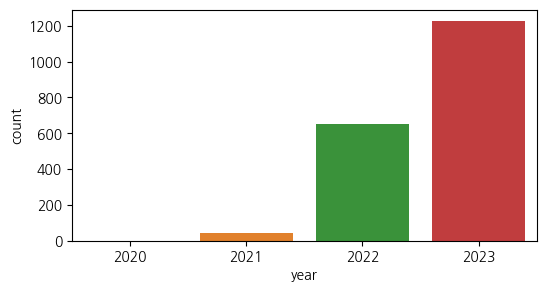

In [9]:
## 연도별 리뷰 건수 
plt.figure(figsize=(6,3))
year_cnt = df['year'].value_counts()
print(year_cnt.sort_index())
sns.countplot(data = df, x='year')

2022년: month
1      11
2      13
3       8
4      18
5      28
6      29
7      44
8      67
9      87
10     80
11     50
12    216
Name: count, dtype: int64
2023년: month
1     125
2     138
3     119
4     106
5     137
6      91
7     123
8     149
9     138
10    102
Name: count, dtype: int64


(0.0, 300.0)

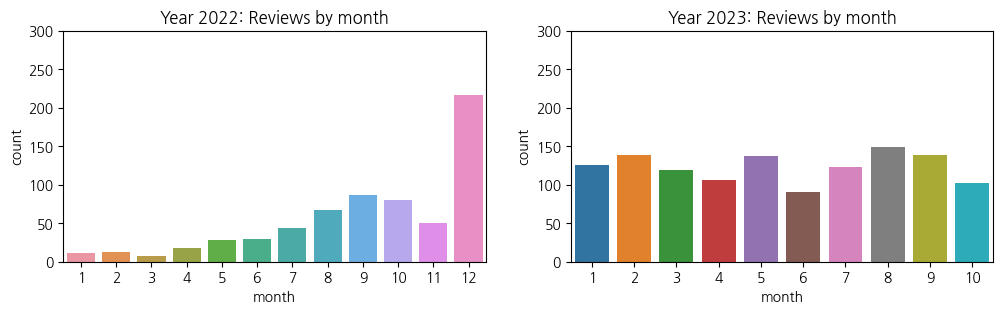

In [10]:
## 2022~ 2023 월별 리뷰 건수 추이 파악 
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]

month_cnt_2022 = df_2022['month'].value_counts()
print('2022년:', month_cnt_2022.sort_index())
month_cnt_2023 = df_2023['month'].value_counts()
print('2023년:', month_cnt_2023.sort_index())

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,3)
sns.countplot(data = df_2022, x='month', ax=ax1)
sns.countplot(data = df_2023, x='month', ax=ax2)
ax1.set(title = 'Year 2022: Reviews by month')
ax2.set(title = 'Year 2023: Reviews by month')
ax1.set_ylim(0, 300) 
ax2.set_ylim(0, 300) 

brand
Chai797    498
정육점        153
Name: count, dtype: int64
brand
Chai797    869
정육점        359
Name: count, dtype: int64


(0.0, 1000.0)

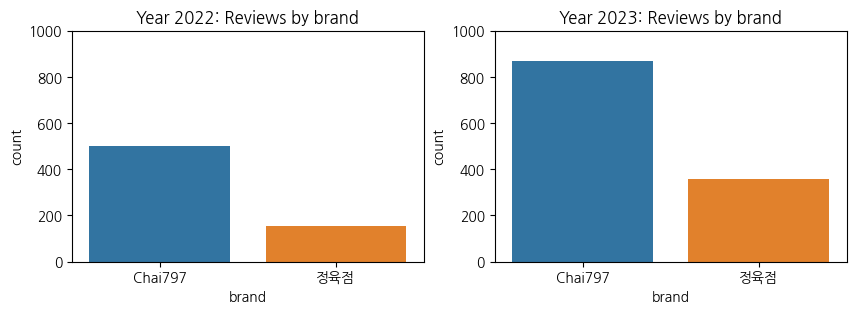

In [11]:
##  브랜드별 리뷰 건수 
brand_cnt_2022 = df_2022['brand'].value_counts()
print(brand_cnt_2022.sort_index())
brand_cnt_2023 = df_2023['brand'].value_counts()
print(brand_cnt_2023.sort_index())

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(10,3)
sns.countplot(data = df_2022, x='brand', ax=ax1)
sns.countplot(data = df_2023, x='brand', ax=ax2)
ax1.set(title = 'Year 2022: Reviews by brand')
ax2.set(title = 'Year 2023: Reviews by brand')
ax1.set_ylim(0, 1000) 
ax2.set_ylim(0, 1000) 

store_naver
Chai797 Black 서래마을    103
Chai797 광화문점           58
정육점 서래마을 본점            52
Chai797 여의도점           48
Chai797 종로 그랑 서울점      44
Chai797 청계천점           44
정육점 을지로점               40
Chai797 삼성점            34
Chai797 잠실롯데캐슬점        33
Chai797 시청점            31
Chai797 을지로점           30
정육점 여의도점               27
Chai797 Plus 서현점       25
Chai797 광화문 SFC점       25
Chai797 역삼 GFC         23
정육점 강남점                20
정육점 광화문 SFC점           14
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Density'>

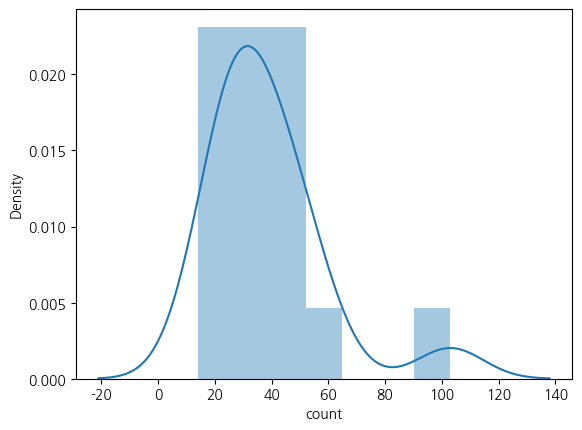

In [12]:
## 매장별 리뷰건수 분포 ('22년')
store_cnt_2022 = df_2022['store_naver'].value_counts()
b = store_cnt_2022.sort_values(ascending=False)
print(b)
sns.distplot(b)

store_naver
Chai797 광화문 SFC점             220
Chai797 Black 서래마을           202
정육점 광화문 SFC점                 144
Chai797 여의도점                  92
정육점 서래마을 본점                   80
Chai797 시청점                   73
Chai797 청계천점                  58
정육점 여의도점                      52
정육점 강남점                       44
Chai797 광화문점                  41
정육점 을지로점                      39
Chai797 종로 그랑 서울점             39
Chai797 잠실롯데캐슬점               34
Chai797 역삼 GFC                30
Chai797 을지로점                  29
Chai797 삼성점                   25
Chai797 Plus 서현점              23
Chai797 Plus 현대시티아울렛 동대문점      3
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Density'>

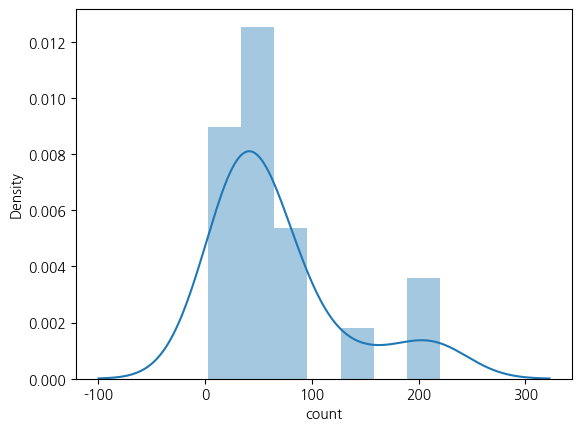

In [13]:
## 매장별 리뷰건수 ('23년')
store_cnt_2023 = df_2023['store_naver'].value_counts()
a = store_cnt_2023.sort_values(ascending=False)
print(a)
sns.distplot(a)

--- 
- '23년 기준 총 리뷰건수는 약 12백건 (월평균 100~120건 내외, 네이버의 약 1/4 수준) 
- 브랜드별로는 Chai797과 정육점의 리뷰숫자가 약 6:4 (실제 매장수 비율은 7:3, 정육점 이용고객들이 리뷰가 조금 많은 편) 
- '23년 1개 매장당 평균 리뷰건수는 68건, 서래마을/SFC 등 몇몇 매장에 리뷰가 집중된 경향을 보임 
--- 

In [14]:
## 고객 1명 기준으로 몇건의 리뷰를 작성하였는지 파악 
from collections import Counter
x1 = dict(Counter(df['nickname'])) ## 닉네임 중복횟수를 dict로 저장 
x1_df = pd.DataFrame.from_dict(x1, orient='index')  ## 데이터프레임 형태로 변환 
x1_df.columns = ['review_cnt']
x1_df.head()

,review_cnt
푸디60,1
재미있는 미식가_9435,1
뽀삐이,1
경쾌한 맛사냥꾼_53243,2
다름아,1


In [15]:
print('1인당 평균 리뷰수 = ', np.mean(x1_df['review_cnt']))
print('1인 최다 리뷰횟수 = ', np.max(x1_df['review_cnt']))
x1_df.sort_values('review_cnt', ascending = False)[:10]

1인당 평균 리뷰수 =  1.1923076923076923
1인 최다 리뷰횟수 =  8


,review_cnt
꼼꼼한 마스터_85428,8
북한산사나이,8
nimgnujah,7
Dr. CG,7
abstrade,7
빛나는 셀럽_49520,5
DreamingPaul,5
맛셔너리,5
Ryanshin,5
hurr,5


In [16]:
## 리뷰자 별 리뷰내용을 살펴보자 
reviewer = '꼼꼼한 마스터_85428'

x1_1 = df[df['nickname'] == reviewer]
x1_1

,review_id,brand,type,store_catchT,store_naver,nickname,content,date,star,year,month,day,weekday,date_YM
715,1644190,Chai797,Dining,Chai797 SFC점,Chai797 광화문 SFC점,꼼꼼한 마스터_85428,친절하고 담소 나누기 좋아요,2023-03-02 14:02:00,4.7,2023,3,14,Thursday,2023-03
718,1645587,Chai797,JUCD,Chai797 시청점,Chai797 시청점,꼼꼼한 마스터_85428,홀에도 독립공간처럼 돼 있는 곳들 많아서 편하게 대화하기 좋아요,2023-03-03 14:15:00,4.3,2023,3,14,Friday,2023-03
860,1730798,Chai797,JUCD,Chai797 GFC점,Chai797 역삼 GFC,꼼꼼한 마스터_85428,좋은 위치에 괜찮은 맛. 짬뽕이 좀 매워서 맵찔이에게는 힘들어요,2023-04-27 13:37:00,4.7,2023,4,13,Thursday,2023-04
903,1752386,Chai797,Dining,Chai797 SFC점,Chai797 광화문 SFC점,꼼꼼한 마스터_85428,위치 좋고 직원들 친절해서 좋아요. 짬뽕은 조금 매울수 있어요,2023-05-09 13:56:00,4.8,2023,5,13,Tuesday,2023-05
1361,2092494,Chai797,Dining,Chai797 SFC점,Chai797 광화문 SFC점,꼼꼼한 마스터_85428,"런치 스페셜 구성, 맛 모두 우수.",2023-10-12 15:16:00,4.8,2023,10,15,Thursday,2023-10
1654,1666969,정육점,JUCD,바른고기정육점 강남점,정육점 강남점,꼼꼼한 마스터_85428,가격이 비싼 편이라면 서비스라도 좋아야 하는데...,2023-03-16 17:33:00,3.5,2023,3,17,Thursday,2023-03
1697,1720076,정육점,JUCD,바른고기정육점 강남점,정육점 강남점,꼼꼼한 마스터_85428,"안심코스 먹었는데, 강남역 감안해도 살짝 비싸긴 함.그래도 손님 모시기에는 괜찮음.",2023-04-20 13:57:00,4.5,2023,4,13,Thursday,2023-04
1718,1751236,정육점,UCD,바른고기정육점 광화문SFC점,정육점 광화문 SFC점,꼼꼼한 마스터_85428,세트와 코스의 차이가 달랑 아이스크림 모나카 하나인데... 가격은 1만원,2023-05-08 18:09:00,4,2023,5,18,Monday,2023-05


---
### 별점분석 
- star 변수의 타입을 숫자형태로 변경, 5점 만점이므로 2점 이하 부정적 & 3점 중립 & 4점 이상 긍정적으로 구분  
- 전체 평점, 기간별 평점 추이, 브랜드/매장별 평점 비교 등 
---

In [17]:
## 별점 분석시 에러발생, 확인해보니 이상한 값 1건 존재 
df[df['star'] == ' ?人不露相！ ']

,review_id,brand,type,store_catchT,store_naver,nickname,content,date,star,year,month,day,weekday,date_YM
836,1719556,Chai797,Dining,Chai797 SFC점,Chai797 광화문 SFC점,李福雨,"명불허전,\n음식완벽,\n服?太棒,",2023-04-19 22:12:00,?人不露相！,2023,4,22,Wednesday,2023-04


In [18]:
## 값 제거 
df = df[df['star'] != ' ?人不露相！ ']

>> 전체 별점평균=  4.21


<Axes: >

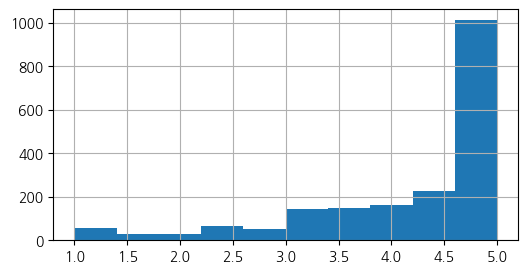

In [19]:
df['star'] = df['star'].astype(float)

print('>> 전체 별점평균= ', round(df['star'].mean(), 2))
df['star'].hist(figsize = (6,3))

[Text(0.5, 1.0, '월별 별점 추이')]

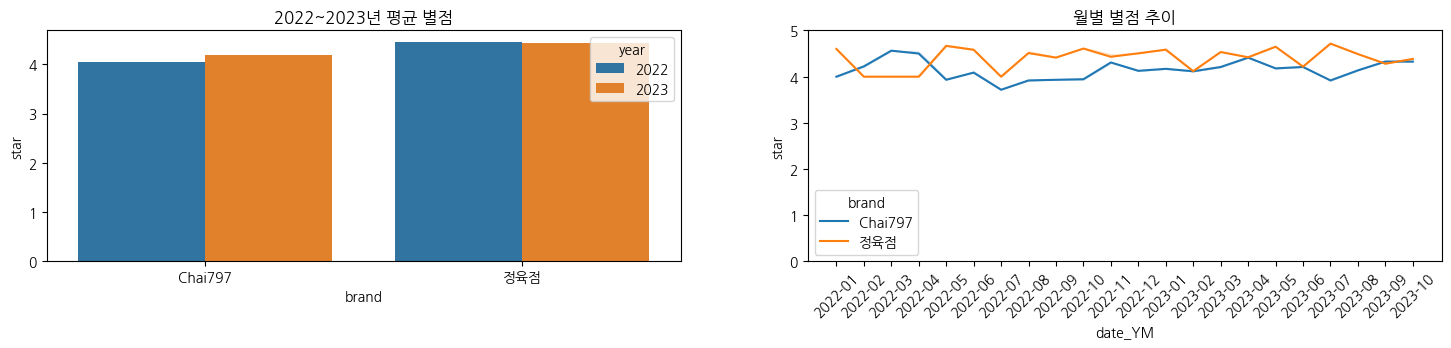

In [20]:
## 리뷰가 본격화된 '22년 이후, 평균 별점 (브랜드별 연도 및 월별 점수) 
df_over_2022 = df[df['year'] >= 2022] 

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,3)
sns.barplot(data=df_over_2022, x='brand', y='star', hue='year', ci=0, ax=ax1)
sns.lineplot(data=df_over_2022, x='date_YM', y='star', hue='brand', ci=0, ax=ax2)
plt.ylim([0, 5])  
plt.xticks(rotation=45)
ax1.set(title = '2022~2023년 평균 별점')
ax2.set(title = '월별 별점 추이')

- 평균 4점대 이상의 높은 수준을 꾸준하게 유지하고 있음 

Text(0.5, 1.0, '매장별 별점 평균 - 2022~2023년')

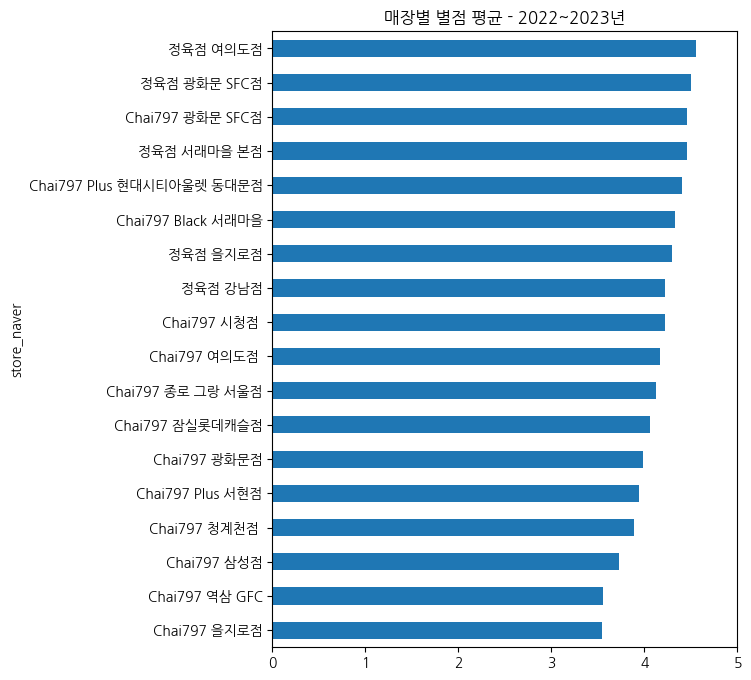

In [21]:
## 매장별 별점 평균 
df_sorted = df_over_2022.groupby('store_naver')['star'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,8))
df_sorted.plot(kind='barh')
plt.xlim([0,5])
plt.title('매장별 별점 평균 - 2022~2023년')

In [22]:
#df_over_2022.groupby('brand')['star'].mean().sort_values(ascending=False)
#df_over_2022.groupby('store_naver')['star'].mean().sort_values(ascending=False)
#df_over_2022.groupby('date_YM')['star'].mean().sort_index(ascending=True)

In [23]:
## 별점이 3점을 기준으로 부정/중립/긍정 구분
df_over_2022['star_seg'] = df_over_2022['star'].apply(lambda x: '1.긍정' if x > 3 else '2.중립' if x == 3 else '3.부정')
df_over_2022.head(2)

,review_id,brand,type,store_catchT,store_naver,nickname,content,date,star,year,month,day,weekday,date_YM,star_seg
29,233400,Chai797,JUCD,Chai797 GFC점,Chai797 역삼 GFC,abstrade,NaN,2022-01-03 20:18:00,5.0,2022,1,20,Monday,2022-01,1.긍정
30,249584,Chai797,UCD,Chai797 청계천점,Chai797 청계천점,끌로딘,종종 방문하는곳인데 오늘 먹은 어향표고새우는 좀 많이 실망했어요. 미리튀겨놨다 다시...,2022-01-12 21:45:00,2.5,2022,1,21,Wednesday,2022-01,3.부정


star_seg
1.긍정    1591
2.중립      66
3.부정     221
Name: count, dtype: int64


<Axes: xlabel='star_seg'>

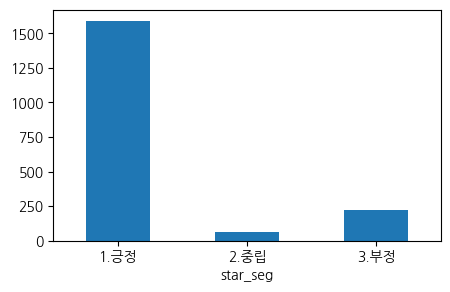

In [24]:
df_starSeg = df_over_2022['star_seg'].value_counts()
print(df_starSeg.sort_index())

df_starSeg.sort_index().plot(kind='bar', figsize=(5,3), rot=0)

<Axes: xlabel='date_YM', ylabel='count'>

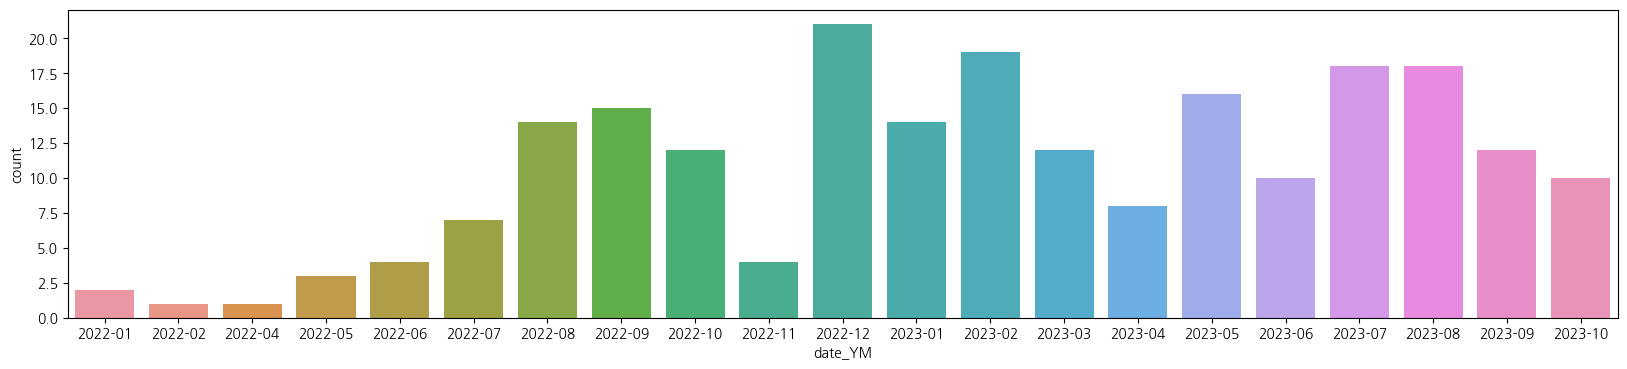

In [25]:
df_bad = df_over_2022[df_over_2022['star_seg'] == '3.부정'].sort_values('date_YM')

plt.figure(figsize=(20, 4))
sns.countplot(data = df_bad, x='date_YM')

- 부정적 리뷰가 계속 증가 또는 감소하는 등의 추세는 보이지 않는다. 

In [26]:
## 특정 매장에 대한 부정적 리뷰 건들의 원문을 살펴보자. 먼저 전체 매장명 출력
print(df_bad['store_naver'].unique())

['Chai797 청계천점 ' 'Chai797 을지로점' '정육점 여의도점' 'Chai797 역삼 GFC' 'Chai797 삼성점'
 'Chai797 Plus 서현점' 'Chai797 종로 그랑 서울점' 'Chai797 Black 서래마을'
 'Chai797 광화문점' '정육점 강남점' 'Chai797 여의도점 ' 'Chai797 시청점 ' '정육점 서래마을 본점'
 'Chai797 잠실롯데캐슬점' '정육점 광화문 SFC점' 'Chai797 광화문 SFC점' '정육점 을지로점']


In [27]:
## want_store = 'xxxx' 에 원하는 매장명을 입력하라, 지정한 매정에 대해 부정적 리뷰 전체를 최신순서로 표시한다. 
want_store = 'Chai797 을지로점'

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df_want_store = df_bad[df_bad['store_naver'] == want_store]
print('>> 부정 리뷰 건수 = ', df_want_store.shape[0])
df_want_store[['store_naver', 'date', 'content']].sort_values(by='date', ascending = False)

>> 부정 리뷰 건수 =  17


,store_naver,date,content
1301,Chai797 을지로점,2023-09-19 15:13:00,음식이 너무짜요
1252,Chai797 을지로점,2023-09-05 13:34:00,짜장면의 면 양은 많으나 싱거웠음\n요리2개를 주문 하고 각각 2군데로 소분을 요청했으나 안된다고 함. \n따로 접시를 준다고 함. 응대 서비스는 실망스러움.
1243,Chai797 을지로점,2023-09-02 12:12:00,가격 대비 맛이 좋은 것은 아니네요
1144,Chai797 을지로점,2023-08-05 17:37:00,페르소나를 그려본다면 40대 와이셔츠 입은 아저씨들이 힙해보이려고 먹는 곳. 딤섬은 전자렌지 뎁히는건지 차갑게 나와서 어이가 없었던 것 빼고는 다 무난했음
1037,Chai797 을지로점,2023-06-29 21:47:00,"접시부터 너무 지저분하고 , 저가뷔페 음식 먹는 느낌... 완전실망"
1012,Chai797 을지로점,2023-06-20 13:54:00,방문할 때마다 늦게 나오고 제 각각 나와서 별로에요
877,Chai797 을지로점,2023-05-04 14:22:00,맛은 많이 아쉽습니다 \n특히 딤섬종류가요
779,Chai797 을지로점,2023-03-23 22:01:00,가성비 극대노...근처 노포 중식당이 훨남
546,Chai797 을지로점,2023-01-11 09:36:00,"점심 코스요리를 먹었는데, 짜고 비리고(세상에 중국요리에서 비린맛은 처음이네요) , 서비스도 처음 출근한 알바가 교육도 제대로 받지 않아 실수 투성이고… 가격대비 최악의 경험"
478,Chai797 을지로점,2022-12-25 03:21:00,"크리스마스인데도 가게가 텅텅 비어 있는데는 다 이유가 있는 것 같네요. 같이 간 일행 모두 맛이 없다고 입을 모았습니다. 딤섬은 그냥 한섬 만두 쪄 먹는 게 더 나을 것 같았고, 꿔바로우는 진짜 자르는 족족 고기가 튀김 옷과 분리가 되어 떨어지는데다 튀김옷이 너무 너무 딱딱했어요. 볶음밥은 평범했고, 짬뽕은 국물만 떠먹고 면은 다 남겼어요. 더 문젠 식사한지 벌써 10시간이 넘었는데 아직도 속이 안좋아요. 근처 중국집에서 점심을 먹어도 이정도는 아닌데. 음식 맛 직접 좀 보시고 개선 좀 하시길요."
